<a href="https://colab.research.google.com/github/mawehhh/SantosMaurice_CSST_104_Advanced-Machine-Learning/blob/main/Hotel_Review_Sentiment_Analysis_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from scipy import stats
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

#Data Handling

In [ ]:

# Read the data into a DataFrame
df = pd.read_csv('cleaned_data.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)

# Display the first few rows of the dataframe
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Check data types
print(df.dtypes)

# Handle missing values
# Drop rows with missing values in any column
df.dropna(inplace=True)

# Fill missing values in 'Rating' column with a default value
df['Rating'].fillna(0, inplace=True)

# Standardize text
# Convert 'Customer_name', 'Review_Title', and 'Review' columns to lowercase
df['Customer_name'] = df['Customer_name'].str.lower()
df['Review_Title'] = df['Review_Title'].str.lower()
df['Review'] = df['Review'].str.lower()

# Remove leading and trailing whitespaces from 'Customer_name', 'Review_Title', and 'Review' columns
df['Customer_name'] = df['Customer_name'].str.strip()
df['Review_Title'] = df['Review_Title'].str.strip()
df['Review'] = df['Review'].str.strip()

# Remove duplicate rows
df.drop_duplicates(inplace=True)

   Customer_name  Rating                                       Review_Title  \
0  maneshpreet26       5  unforgettable experience..amazing staycation e...   
1   majnu gosavi       5           all about in love with grand hyatt hotel   
2  akash bhosale       5                         most knowledgeable trainer   
3    mahek dugar       5                 a night stay at grand hyatt mumbai   
4         jaslin       4                                         staycation   

                                              Review  
0  we visited grand hyatt on the occasion of my s...  
1  तुम्हारी क्या तारीफ करू  तुम्ह ही तो तारीफ हो ...  
2  i was fascinated by the diet and exercise know...  
3  absolutely loved the stay. amazing food, ambie...  
4  i had booked grand hyatt santacruz for staycat...  
Customer_name    0
Rating           0
Review_Title     0
Review           0
dtype: int64
Customer_name    object
Rating            int64
Review_Title     object
Review           object
dtype: obj

#Data Analysis Techniques

            Rating
count  5000.000000
mean      4.431400
std       0.992518
min       1.000000
25%       4.000000
50%       5.000000
75%       5.000000
max       5.000000
Rating
5    3294
4    1090
3     286
1     191
2     139
Name: count, dtype: int64


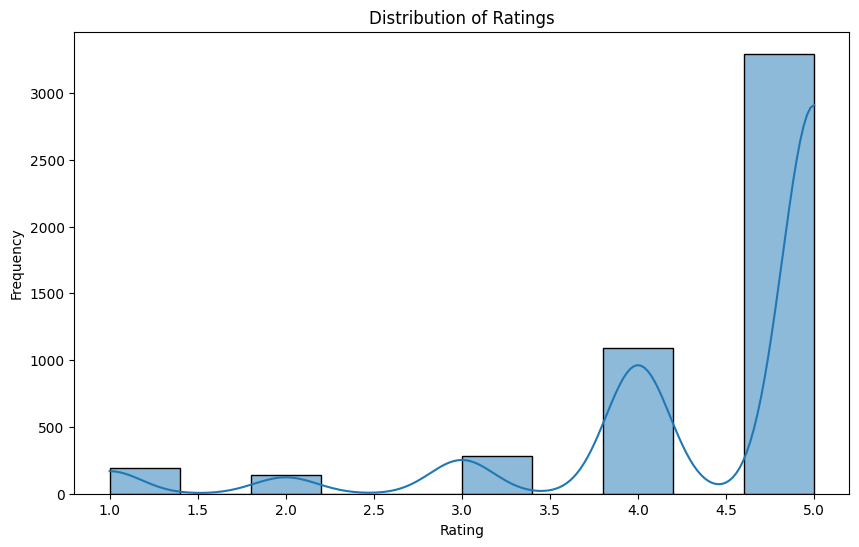

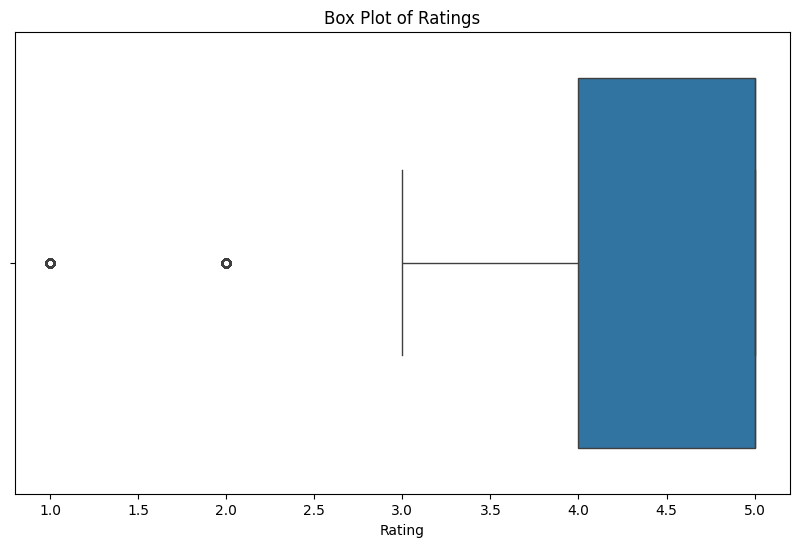

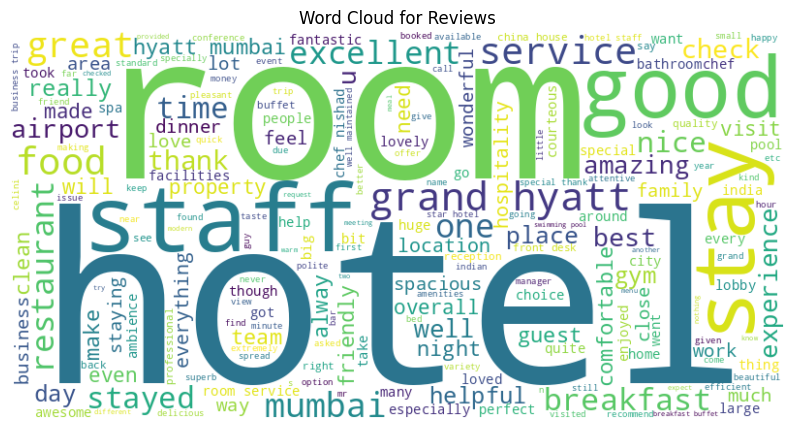

In [ ]:

# Display basic statistics for numerical columns
numerical_summary = df.describe()
print(numerical_summary)

# Get the distribution of the 'Rating' column
rating_counts = df['Rating'].value_counts()
print(rating_counts)

# Plot histogram for the 'Rating' column
plt.figure(figsize=(10, 6))
sns.histplot(df['Rating'], bins=10, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# Plot box plot for the 'Rating' column
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Rating'])
plt.title('Box Plot of Ratings')
plt.xlabel('Rating')
plt.show()

# Combine all reviews into a single string
reviews = ' '.join(df['Review'])

# Generate a word cloud for reviews
wordcloud_reviews = WordCloud(width=800, height=400, background_color='white').generate(reviews)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_reviews, interpolation='bilinear')
plt.title('Word Cloud for Reviews')
plt.axis('off')
plt.show()


#Implement inferential statistics to draw conclusions or make predictions

In [ ]:

# Perform a one-sample t-test
mean_rating = df['Rating'].mean()
print("Mean Rating:", mean_rating)

t_statistic, p_value = stats.ttest_1samp(df['Rating'], 3)

print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

# Interpret the result
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. The average rating is significantly different from 3.")
else:
    print("Fail to reject the null hypothesis. The average rating is not significantly different from 3.")

# Combine review title and review into a single text field
df['Review_Text'] = df['Review_Title'] + " " + df['Review']

# Vectorize the text data
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(df['Review_Text']).toarray()

# Target variable
y = df['Rating']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Rating: 4.4314
T-Statistic: 101.97831377488745
P-Value: 0.0
Reject the null hypothesis. The average rating is significantly different from 3.
Mean Squared Error: 0.5067981153262295
R-squared: 0.4527201407660981


#Develop a predictive model to forecast future trends

In [ ]:


# Combine review title and review into a single text field
df['Review_Text'] = df['Review_Title'] + " " + df['Review']

# Vectorize the text data
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(df['Review_Text']).toarray()

# Target variable
y = df['Rating']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Function to preprocess new review data and make predictions
def predict_future_reviews(new_reviews):
    # Preprocess the new reviews
    new_reviews_combined = [title + " " + review for title, review in new_reviews]
    new_X = vectorizer.transform(new_reviews_combined).toarray()

    # Make predictions
    future_predictions = model.predict(new_X)

    return future_predictions

# Example new reviews (list of tuples with title and review)
new_reviews = [
    ("Great Stay", "The hotel was clean and the staff were friendly."),
    ("Terrible Experience", "The room was dirty and service was awful."),
    ("Average Hotel", "The stay was okay, nothing special."),
]

# Predict future ratings
future_ratings = predict_future_reviews(new_reviews)
print("Predicted Future Ratings:", future_ratings)


Mean Squared Error: 0.4935848
R-squared: 0.4669889020993899
Predicted Future Ratings: [4.8  2.3  3.68]


#Create and explain various plots and visualizations, such as bar charts, pie charts, and heatmaps.

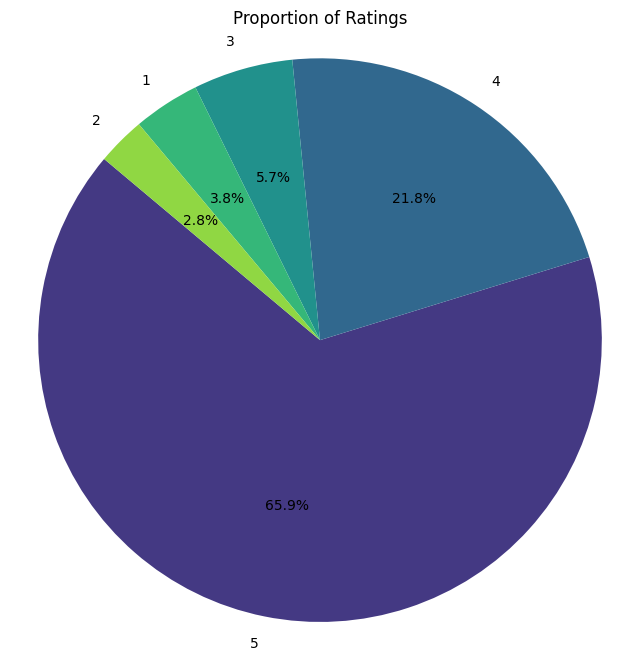

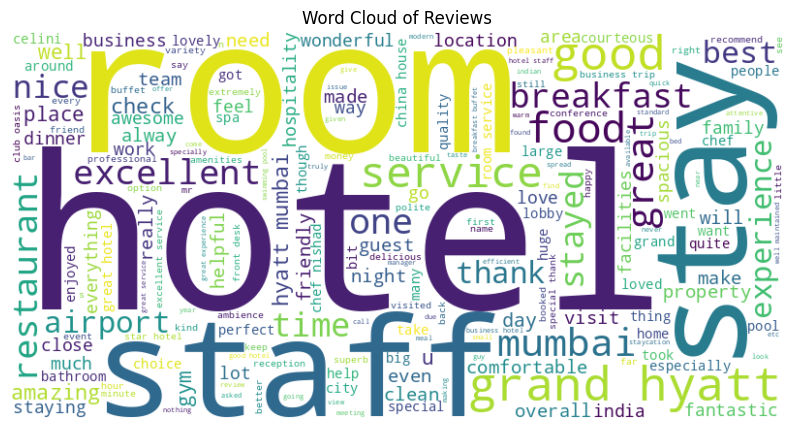

In [ ]:


# Pie chart for the distribution of ratings
rating_counts = df['Rating'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(rating_counts)))
plt.title('Proportion of Ratings')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Correlation matrix heatmap
# Selecting only numerical columns for the correlation matrix
numerical_df = df.select_dtypes(include=[float, int])



# Combine all review titles and reviews into a single string
all_text = ' '.join(df['Review_Title']) + ' ' + ' '.join(df['Review'])

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Reviews')
plt.axis('off')
plt.show()




#Draw specific insights from each type of visualization

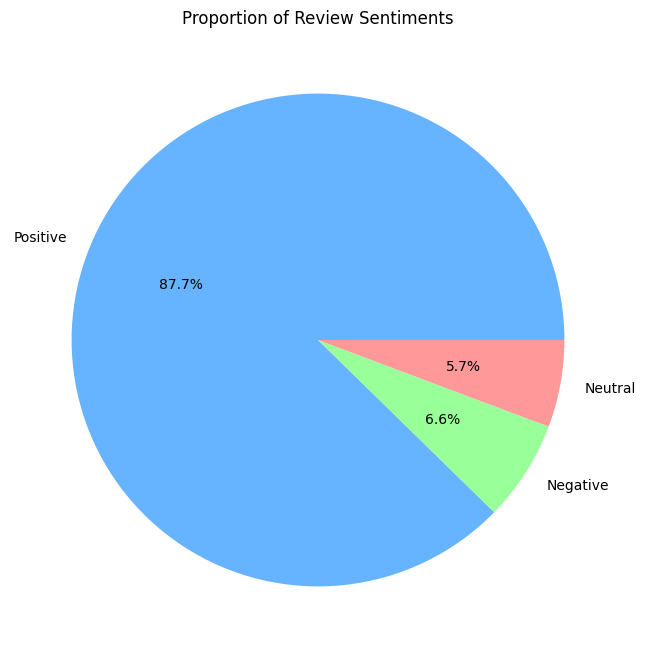

In [ ]:
def classify_review(rating):
    if rating >= 4:
        return 'Positive'
    elif rating == 3:
        return 'Neutral'
    else:
        return 'Negative'

df['review_sentiment'] = df['Rating'].apply(classify_review)

sentiment_counts = df['review_sentiment'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=['#66b3ff','#99ff99','#ff9999'])
plt.title('Proportion of Review Sentiments')
plt.show()